In [1]:
import sys
import os
import numpy as np
import pickle
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt

In [125]:
# ds = xr.open_dataset("large_data.nc", chunks={"time": 100})
ds=xr.open_dataset("/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0030.nc")
grid=xr.open_dataset("/sugon7/zsm/croco_tools_xmd1204/CROCO_FILES/TWS2/TWS2_rot2.nc")


In [126]:
ds

<xarray.Dataset> Size: 29kB
Dimensions:  (time: 24, nq: 50)
Coordinates:
  * time     (time) float64 192B 3.758e+09 3.758e+09 ... 3.758e+09 3.758e+09
Dimensions without coordinates: nq
Data variables:
    frame    (time) int32 96B ...
    px       (time, nq) float64 10kB ...
    py       (time, nq) float64 10kB ...
    pz       (time, nq) float64 10kB ...

In [127]:
grid

<xarray.Dataset> Size: 79MB
Dimensions:      (one: 1, eta_rho: 601, xi_rho: 421, bath: 1, eta_u: 601,
                  xi_u: 420, eta_v: 600, xi_v: 421, eta_psi: 600, xi_psi: 420)
Coordinates:
    lon_rho      (eta_rho, xi_rho) float64 2MB ...
    lat_rho      (eta_rho, xi_rho) float64 2MB ...
    xi_rho       (eta_rho, xi_rho) float64 2MB ...
    eta_rho      (eta_rho, xi_rho) float64 2MB ...
    xi_psi       (eta_psi, xi_psi) float64 2MB ...
    eta_psi      (eta_psi, xi_psi) float64 2MB ...
    xi_u         (eta_u, xi_u) float64 2MB ...
    eta_u        (eta_u, xi_u) float64 2MB ...
    xi_v         (eta_v, xi_v) float64 2MB ...
    eta_v        (eta_v, xi_v) float64 2MB ...
Dimensions without coordinates: one, bath
Data variables: (12/34)
    xl           (one) float64 8B ...
    el           (one) float64 8B ...
    depthmin     (one) float64 8B ...
    depthmax     (one) float64 8B ...
    spherical    (one) int32 4B ...
    angle        (eta_rho, xi_rho) float64 2MB ...
    ...           ...
    mask_rho     (eta_rho, xi_rho) float64 2MB ...
    mask_u       (eta_u, xi_u) float64 2MB ...
    mask_v       (eta_v, xi_v) float64 2MB ...
    mask_psi     (eta_psi, xi_psi) float64 2MB ...
    visc_factor  (eta_rho, xi_rho) float64 2MB ...
    diff_factor  (eta_rho, xi_rho) float64 2MB ...
Attributes: (12/13)
    title:          TWS_child
    date:           19-Apr-2025
    type:           CROCO grid file
    donor_grid:     /sugon7/zsm/croco_tools_xmd1204/CROCO_FILES/TWS2/grd_rot.nc
    donor_Xcenter:  119.2
    donor_Ycenter:  24.5
    ...             ...
    rotated_dx:     500.0
    rotated_dy:     500.0
    rotated_Im:     420
    rotated_Jm:     600
    history:        GRID file created using Matlab script /sugon7/zsm/croco_t...
    sponge:         19-Apr-2025 created with /sugon7/zsm/croco_tools_xmd1204/...

In [128]:
px=ds['px']
py=ds['py']
xi=grid['xi_rho']
eta=grid['eta_rho']
h=grid['h']
mask=grid['mask_rho'].values
mask[mask==0]=np.nan

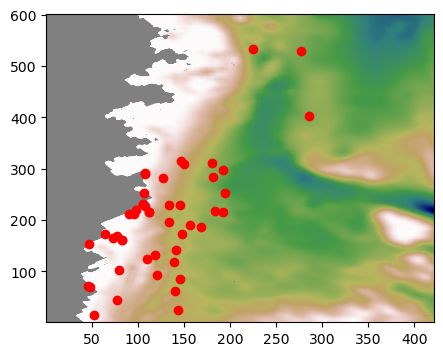

In [129]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_facecolor('grey')
# ax.contourf(xi,eta,h*mask)
cr1=ax.pcolormesh(xi,eta,h*mask,shading='gouraud',cmap=plt.cm.gist_earth_r)
ax.plot(px[23],py[23],linestyle='none',marker='o',color='r')

In [120]:
px[0].data
py[0].data

array([339., 340., 316., 346., 321., 349., 314., 321., 339., 312., 329.,
       324., 318., 333., 316., 316., 313., 347., 350., 349., 310., 304.,
       314., 343., 319., 336., 328., 322., 306., 343., 334., 312., 341.,
       307., 313., 314., 312., 309., 315., 306., 307., 320., 321., 338.,
       326., 348., 305., 333., 312., 310.])

In [94]:


with open("/home/zsm/PY_PART_ROMS-Dauhajre/part_in/test500kpp_in.p", "rb") as f:
    data = pickle.load(f, encoding="latin1")  # 加载数据

In [95]:
px0=data['px']
py0=data['py']
px0.shape

(50,)

In [5]:
file_pattern = "/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.{:04d}.nc"
file_list = [file_pattern.format(i) for i in range(16, 31)]  # 生成16到30的文件名

# 自动合并（要求时间维度可自动对齐）
merged_ds = xr.open_mfdataset(
    file_list,
    combine="by_coords",  # 按坐标自动对齐
)

# 保存合并结果
merged_ds.to_netcdf("/home/zsm/PY_PART_ROMS-Dauhajre/part_out/tide_merged_16_30.nc")
print("合并完成！")

合并完成！


In [6]:
file_list,os.getcwd()

(['/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0016.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0017.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0018.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0019.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0020.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0021.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0022.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0023.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0024.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0025.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0026.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0027.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0028.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0029.nc',
  '/home/zsm/PY_PART_ROMS-Dauhajre/part_out/test500kpp.0030.nc'],
 '/home/zsm')